In [285]:
from data_pipeline import *
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
from clustering import *
import seaborn as sns
import scipy.stats as stats

In [286]:
root_gene = 'CRP'
minimum_evidence = 'weak'
max_depth = np.inf
r_expr, gene_symbols, sample_names = load_data(root_gene=root_gene,
                                     minimum_evidence=minimum_evidence,
                                     max_depth=max_depth)
nb_genes = len(gene_symbols)
synthetic_name = 'rej_EColi_n{}_r{}_e{}_d{}'.format(nb_genes, root_gene, minimum_evidence, max_depth)
s_expr, s_gs = load_synthetic(synthetic_name)

assert (np.array(gene_symbols) == np.array(s_gs)).all()

# Split data into train and test sets
train_idxs, test_idxs = split_train_test(sample_names)
expr_train = r_expr[train_idxs, :]
expr_test = r_expr[test_idxs, :]

# Clip outliers
r_min = np.min(expr_train)
r_max = np.max(expr_train)
s_expr[s_expr < r_min] = r_min
s_expr[s_expr > r_max] = r_max

Found 4297 genes in datafile
Found 1208 genes in CRP regulatory network
4297 genes not in gene subset. Selecting 1076 genes ...


In [319]:
import pandas as pd
df = pd.DataFrame(r_expr, index=sample_names, columns=gene_symbols)
df.describe()

,aaea,aaeb,aaer,aaex,acea,aceb,acee,acef,acek,acka,...,yoag,yoji,yqjh,yqji,ysga,ytfe,zrap,zrar,zras,zwf
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,...,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,7.269233,7.310632,7.903326,7.117246,9.978689,10.518604,11.494564,11.383804,8.311764,11.477075,...,7.382766,8.271593,8.223129,8.600038,8.457376,7.749031,7.967402,8.953573,7.974176,9.860426
std,0.254663,0.271102,0.318704,0.386494,1.753916,1.653231,1.303412,1.223834,0.590658,0.969535,...,0.595896,0.505354,0.491603,0.449504,0.609487,0.639036,0.696958,0.257791,0.407920,0.598478
min,6.237100,6.399250,6.523710,6.032260,6.248880,5.907450,7.324590,7.442730,7.038460,8.152910,...,6.184760,5.780420,4.935530,5.101930,4.021760,5.879520,6.023280,7.841790,6.616700,7.043810
25%,7.109095,7.151510,7.696345,6.885195,8.544820,9.332875,10.662300,10.627050,7.894355,10.834350,...,7.067705,7.877700,7.892780,8.340560,8.049575,7.466830,7.541005,8.812050,7.686210,9.512185
50%,7.241650,7.301680,7.901050,7.058580,9.662560,10.177600,11.816600,11.630000,8.198470,11.576200,...,7.313020,8.211880,8.155310,8.591100,8.359450,7.676240,7.769070,8.955430,7.954730,9.948150
75%,7.399660,7.483825,8.129660,7.263930,11.115500,11.755350,12.591450,12.403100,8.605690,12.191100,...,7.590665,8.630660,8.514425,8.818620,8.786205,7.927400,8.189215,9.099110,8.248510,10.263700
max,8.595990,8.337850,9.005470,9.945140,14.122800,13.964300,13.729700,13.487700,10.986600,13.376000,...,13.238800,9.740960,10.116600,11.028400,10.464000,13.149700,12.553700,10.299100,9.481340,11.420700


In [347]:
means = df.mean().values
maxs = df.max().values
mins = df.min().values
print(np.max(maxs))
print(np.min(mins))
print(np.mean(df.values))

15.1911
2.94897
8.774514044533838


# Intensity histograms

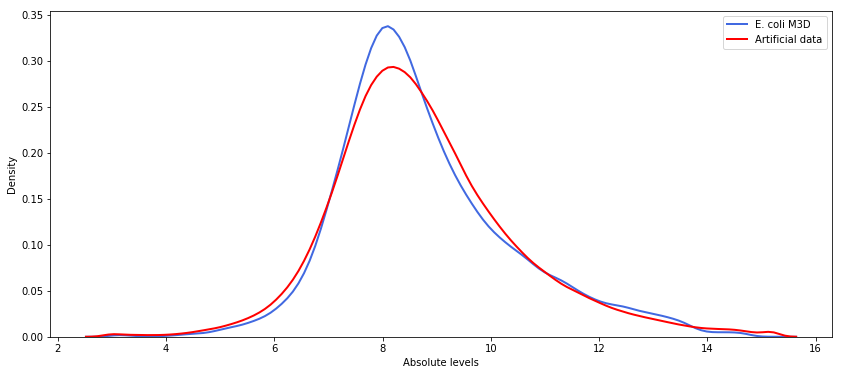

In [348]:
plt.figure(figsize=(14, 6))
ax = plot_intensities(expr_train, plot_quantiles=False)
plot_intensities(s_expr, dataset_name='Artificial data', color='red', plot_quantiles=False, ax=ax);

# Gene ranges histograms

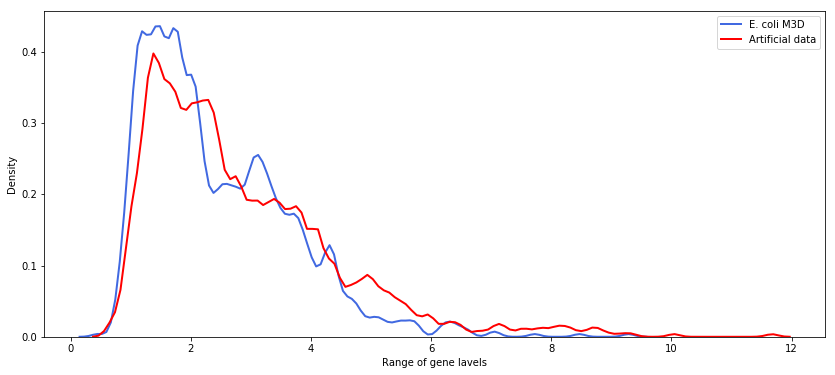

In [288]:
plt.figure(figsize=(14, 6))
# plt.subplot(121)
ax = plot_gene_ranges(expr_train)
# plt.subplot(122)
plot_gene_ranges(s_expr, dataset_name='Artificial data', color='red', ax=ax);

# TF-TG histogram (using synthetic background distribution)

In [173]:
r_tf_tg_corr, r_tg_tg_corr = compute_tf_tg_corrs(expr_train, gene_symbols)
s_tf_tg_corr, s_tg_tg_corr = compute_tf_tg_corrs(s_expr, gene_symbols)
r_back_corr = correlations_list(expr_train, expr_train)
s_back_corr = correlations_list(s_expr, s_expr)

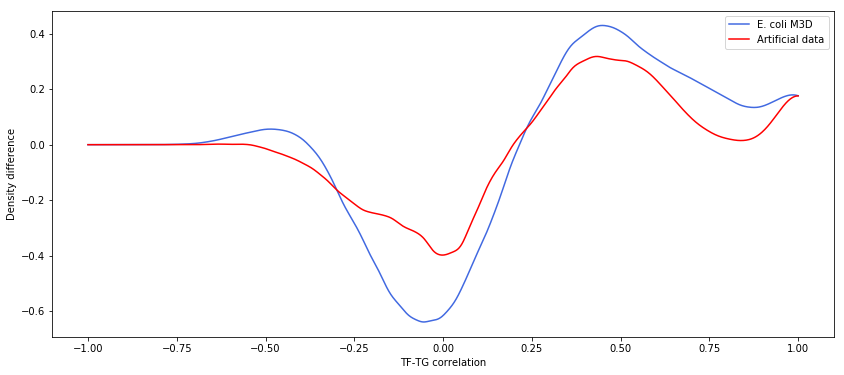

In [174]:
plt.figure(figsize=(14, 6))
ax = plot_difference_histogram(r_tf_tg_corr, r_back_corr, 'TF-TG correlation')
plot_difference_histogram(s_tf_tg_corr, s_back_corr, 'TF-TG correlation', dataset_name='Artificial data', color='red', ax=ax); 

# TF-TG histogram (using real background distribution)

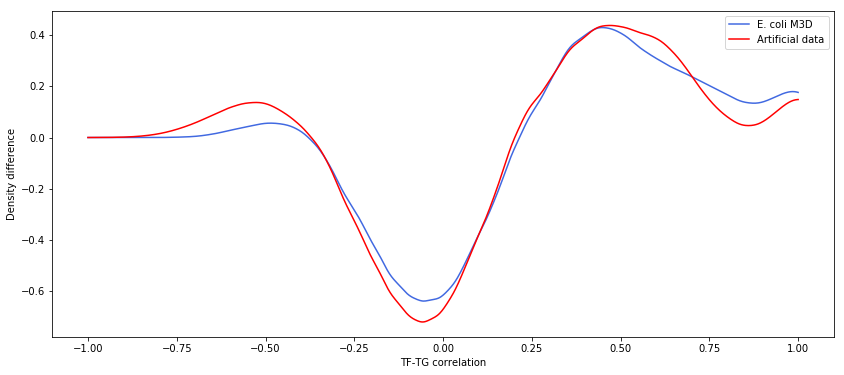

In [130]:
# plt.figure(figsize=(7, 7))
plt.figure(figsize=(14, 6))
ax = plot_difference_histogram(r_tf_tg_corr, r_back_corr, 'TF-TG correlation')
plot_difference_histogram(s_tf_tg_corr, r_back_corr, 'TF-TG correlation', dataset_name='Artificial data', color='red', ax=ax);  # Try s_back_corr

# TG-TG histogram (using synthetic background distribution)

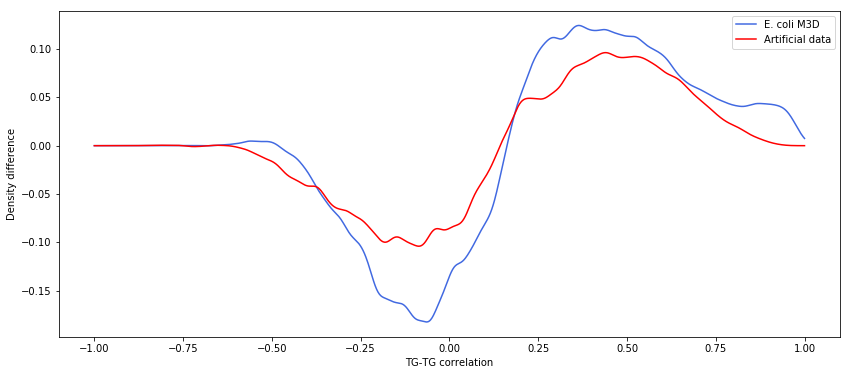

In [131]:
# plt.figure(figsize=(7, 7))
plt.figure(figsize=(14, 6))
ax = plot_difference_histogram(r_tg_tg_corr, r_back_corr, 'TG-TG correlation')
plot_difference_histogram(s_tg_tg_corr, s_back_corr, 'TG-TG correlation', dataset_name='Artificial data', color='red', ax=ax);

# TG-TG histogram (using real background distribution)

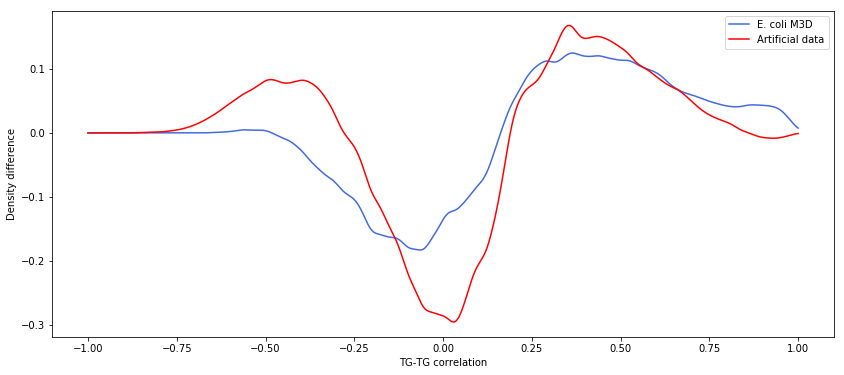

In [132]:
# plt.figure(figsize=(7, 7))
plt.figure(figsize=(14, 6))
ax = plot_difference_histogram(r_tg_tg_corr, r_back_corr, 'TG-TG correlation')
plot_difference_histogram(s_tg_tg_corr, r_back_corr, 'TG-TG correlation', dataset_name='Artificial data', color='red', ax=ax);

# Compare background distributions

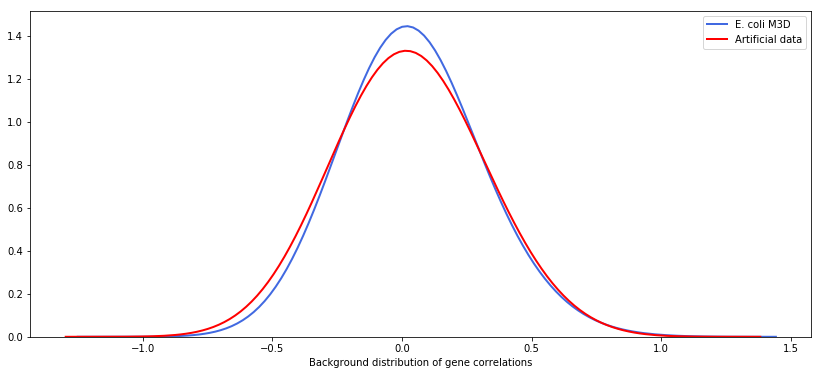

In [133]:
plt.figure(figsize=(14, 6))
ax = plot_distribution(r_back_corr, xlabel='Background distribution of gene correlations')
plot_distribution(s_back_corr, xlabel='Background distribution of gene correlations', label='Artificial data', color='red');

# TF activity histogram

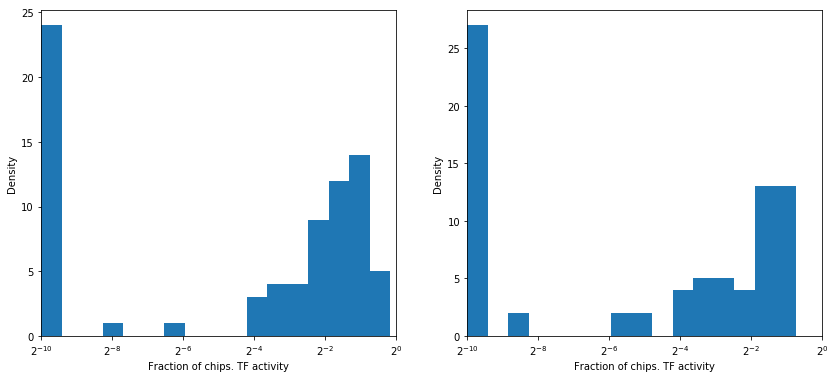

In [134]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_tf_activity_histogram(expr_train, gene_symbols)
plt.subplot(122)
plot_tf_activity_histogram(s_expr, gene_symbols)

# Cophenetic coefficients

In [264]:
gamma_dx_dz, gamma_dx_tx, gamma_dz_tz, gamma_tx_tz = gamma_coefficients(expr_train, s_expr)
print('Gamma(D^X, D^Z): {}'.format(gamma_dx_dz))
print('Gamma(D^X, T^X): {}'.format(gamma_dx_tx))
print('Gamma(D^Z, T^Z): {}'.format(gamma_dz_tz))
print('Gamma(T^X, T^Z): {}'.format(gamma_tx_tz))

r_tf_tg_corr_flat, r_tg_tg_corr_flat = compute_tf_tg_corrs(expr_train, gene_symbols, flat=False)
s_tf_tg_corr_flat, s_tg_tg_corr_flat = compute_tf_tg_corrs(s_expr, gene_symbols, flat=False)
psi_dx_dz = psi_coefficient(r_tf_tg_corr_flat, s_tf_tg_corr_flat)
theta_dx_dz = theta_coefficient(r_tg_tg_corr_flat, s_tg_tg_corr_flat)
print('Psi(D^X, D^Z): {}'.format(psi_dx_dz))
print('Theta(D^X, D^Z): {}'.format(theta_dx_dz))

Gamma(D^X, D^Z): 0.8693137169000124
Gamma(D^X, T^X): 0.5308278489633552
Gamma(D^Z, T^Z): 0.45848287822010364
Gamma(T^X, T^Z): 0.37623997303570667
Psi(D^X, D^Z): 0.9230312527689363
Theta(D^X, D^Z): 0.8880874273843168


# Analyze gene histograms

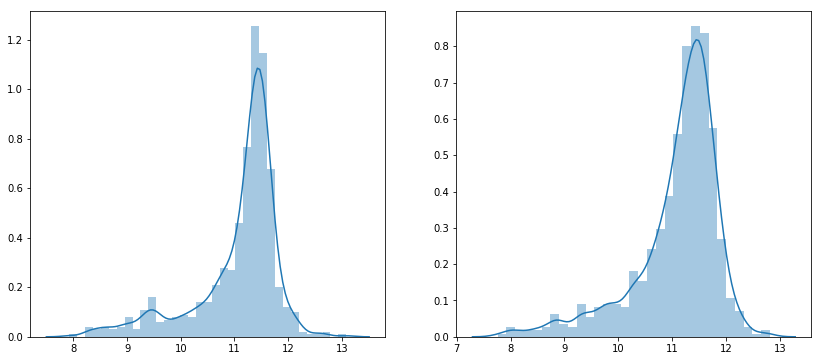

In [265]:
crp_idx = np.argwhere(np.array(gene_symbols) == 'crp')
idx = crp_idx
s_expr_crp = s_expr[:, idx].ravel()
r_expr_crp = expr_train[:, idx].ravel()
plt.figure(figsize=(14, 6))
plt.title('Expression levels of CRP');
plt.subplot(121)
ax = sns.distplot(r_expr_crp)
plt.subplot(122)
ax = sns.distplot(s_expr_crp)

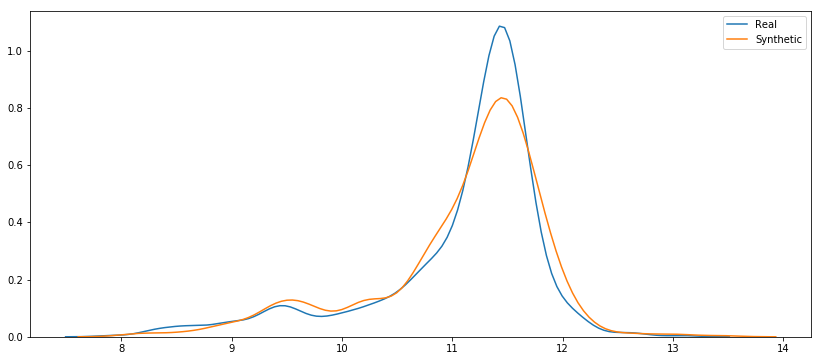

In [289]:
plt.figure(figsize=(14, 6))
r_expr_gene = expr_train[:, crp_idx]
s_expr_gene = s_expr[:, crp_idx]
ax = sns.distplot(r_expr_gene, hist=False, label='Real')
ax = sns.distplot(s_expr_gene, hist=False, label='Synthetic')

In [290]:
diag = np.diag(np.ones(nb_genes))
r_corr = pearson_correlation(expr_train, expr_train) - diag
s_corr = pearson_correlation(s_expr, s_expr) - diag
crp_idx = np.argwhere(np.array(gene_symbols) == 'crp').ravel()

In [291]:
max_corr = np.max(r_corr)
idxs = np.unravel_index(np.argmax(r_corr), r_corr.shape)
print('Maximum correlated ({:.4f}) genes in real dataset: {} and {}'.format(max_corr, gene_symbols[idxs[0]], gene_symbols[idxs[1]]))
print('Correlation in synthetic: {:.4f}'.format(s_corr[idxs[0], idxs[1]]))

Maximum correlated (0.9919) genes in real dataset: araa and arab
Correlation in synthetic: 0.7177


In [292]:
max_corr = np.max(s_corr)
idxs = np.unravel_index(np.argmax(s_corr), s_corr.shape)
print('Maximum correlated ({:.4f}) genes in synthetic dataset: {} and {}'.format(max_corr, gene_symbols[idxs[0]], gene_symbols[idxs[1]]))
print('Correlation in real: {:.4f}'.format(r_corr[idxs[0], idxs[1]]))

Maximum correlated (0.9371) genes in synthetic dataset: rplb and rpsr
Correlation in real: 0.9161


In [293]:
r_corr_crp = r_corr[crp_idx, :].ravel()
s_corr_crp = s_corr[crp_idx, :].ravel()
r_max_corr_crp = np.max(r_corr_crp)
s_max_corr_crp = np.max(s_corr_crp)
sorted_idxs = np.argsort(r_corr_crp)[::-1]
print('CRP max correlated ({:.4f}) gene: {}'.format(r_max_corr_crp, gene_symbols[sorted_idxs[0]]))
print('CRP correlation with {} in synthetic: {}'.format(gene_symbols[sorted_idxs[0]], s_corr_crp[sorted_idxs[0]]))

CRP max correlated (0.7624) gene: hupa
CRP correlation with hupa in synthetic: 0.5935776918983893


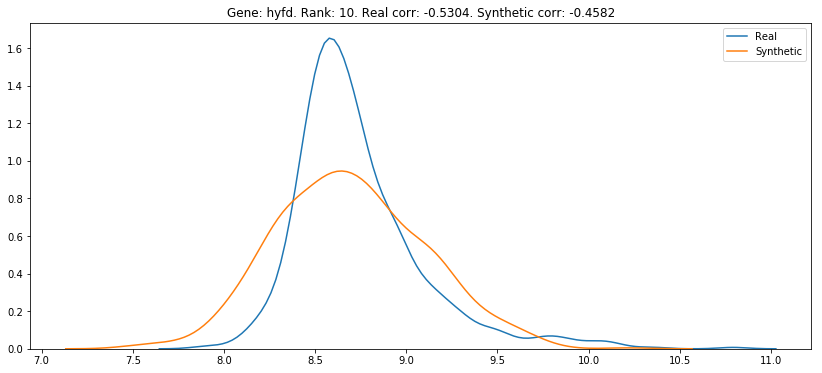

In [428]:
idx = -10
plt.figure(figsize=(14, 6))
r_expr_gene = expr_train[:, sorted_idxs[idx]]
s_expr_gene = s_expr[:, sorted_idxs[idx]]
plt.title('Gene: {}. Rank: {}. Real corr: {:.4f}. Synthetic corr: {:.4f}'.format(gene_symbols[sorted_idxs[idx]],
                                                                          max(idx+1, abs(idx)),
                                                                          r_corr_crp[sorted_idxs[idx]],
                                                                          s_corr_crp[sorted_idxs[idx]]))
ax = sns.distplot(r_expr_gene, hist=False, label='Real')
ax = sns.distplot(s_expr_gene, hist=False, label='Synthetic')

# Master regulators' histograms

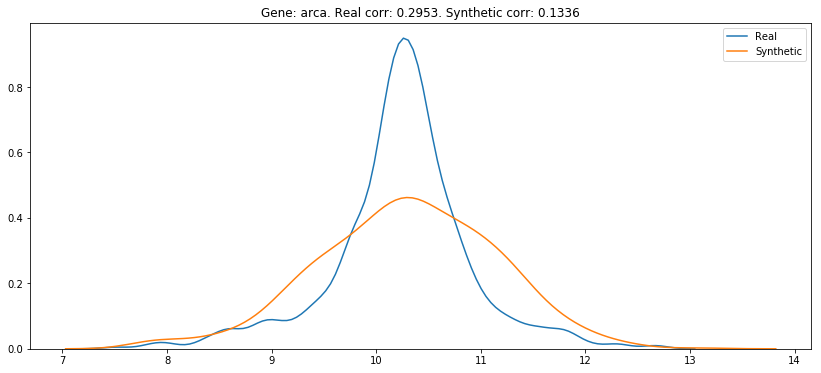

In [432]:
master_regulators = ['fis', 'hns', 'lrp', 'fnr', 'arca']
idx = 4
idx = np.argwhere(np.array(gene_symbols) == master_regulators[idx]).ravel()[0]
plt.figure(figsize=(14, 6))
r_expr_gene = expr_train[:, idx]
s_expr_gene = s_expr[:, idx]
plt.title('Gene: {}. Real corr: {:.4f}. Synthetic corr: {:.4f}'.format(gene_symbols[idx],
                                                                          r_corr_crp[idx],
                                                                          s_corr_crp[idx]))
ax = sns.distplot(r_expr_gene, hist=False, label='Real')
ax = sns.distplot(s_expr_gene, hist=False, label='Synthetic')

In [320]:
sns.jointplot()

TypeError: jointplot() missing 2 required positional arguments: 'x' and 'y'